<img src="https://raw.githubusercontent.com/AugustoInData/Projetos/refs/heads/main/Previs%C3%A3o%20de%20Vendas/cabe%C3%A7alho.png" alt="ebac-logo">

---



# Introdução

Desenvolvimento de um projeto completo de análise de dados utilizando Python, com foco em identificar padrões e fatores que influenciam o volume de vendas globais de jogos de videogame. O trabalho incluiu a coleta e limpeza de dados públicos, análise exploratória com visualização gráfica, tratamento de outliers e construção de um modelo de regressão linear para prever vendas com base em variáveis como avaliações de críticos e usuários. O projeto demonstra a aplicação prática de técnicas de Data Analysis e Machine Learning para geração de insights de mercado e suporte à tomada de decisão.

## Dividiremos essa análise nas seguintes etapas


1.   **Coleta dos Dados**

*   Dataset: Video Game Sales with Ratings (Kaggle)

2.   **Limpeza Inicial**


*   Remover linhas com valores ausentes importantes
*   Corrigir tipos de dados (ano → inteiro, notas → float)


3.   **Análise Exploratória (EDA)**


*   Distribuição de vendas
*   Vendas por gênero/plataforma
*   Relação entre notas e vendas

4.   **Preparação para o modelo**

*   Selecionar features relevantes
*   Codificar variáveis categóricas (OneHotEncoder)
*   Normalizar se necessário

5.   **Treinamento (Regressão Linear)**

*   Dividir treino/teste
*   Treinar LinearRegression (Scikit-learn)

6.   **Avaliação**

*   Métricas: RMSE, MAE, R²
*   Interpretar coeficientes

7.   **Visualização dos Resultados**

*   Comparar valores reais vs previstos
*   Gráfico de importância de variáveis



##Objetivo inicial

Queremos prever as vendas globais de um jogo de videogame com base nas suas características, ajudando empresas a identificar quais fatores influenciam mais no sucesso de vendas.

Para isso iremos trabalhar com o dataset 'Video Game Sales with Ratings'

Mãos a obra!

# 1. Coleta dos Dados


Nessa etapa inicial da análise será importada a base de dados do projeto. Além disso, será verificado também a estrutura do banco de dados para que sejam obtidas informações tais como tamanho, colunas e se há incidência de valores nulos nas colunas para podermos tratá-los na fase de limpeza.

## Base de dados que será utilizada

### Dataset: Video Game Sales with Ratings (Kaggle)

In [1]:
!wget https://raw.githubusercontent.com/AugustoInData/Projetos/refs/heads/main/Previs%C3%A3o%20de%20Vendas/Video_Games_Sales_as_at_22_Dec_2016.csv

--2025-10-16 19:57:04--  https://raw.githubusercontent.com/AugustoInData/Projetos/refs/heads/main/Previs%C3%A3o%20de%20Vendas/Video_Games_Sales_as_at_22_Dec_2016.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1601320 (1.5M) [text/plain]
Saving to: ‘Video_Games_Sales_as_at_22_Dec_2016.csv’

Video_Games_Sales_a 100%[===================>]   1.53M  --.-KB/s    in 0.04s   

2025-10-16 19:57:05 (36.5 MB/s) - ‘Video_Games_Sales_as_at_22_Dec_2016.csv’ saved [1601320/1601320]



## Analisando a estrutura dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Nessa primeira etapa da exploração descobrimos que o banco de dados possui 16.718 jogos a serem analisados (Não levei em consideração a linha do cabeçalho). Esse banco de dados também possui 16 colunas de informações pertinentes a cada jogo.

In [3]:

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

print(df.shape)

(16719, 16)


### Como podemos ver abaixo, ao analisarmos as primeiras e últimas linhas do nosso banco de dados algo ficou bem claro! Temos muitas linhas com valores nulos e precisaremos tratar isso na etapa de limpeza de dados.

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Nessa etapa ficou muito evidente o volume de dados nulos em algumas colunas e que precisaremos tratar a seguir na fase de limpeza dos dados. Vale destacar que a coluna User_Count é a que mais possui dados nulos. Essa coluna mostra quantos usuários participaram da votação no Metacritcs resultando na nota de cada jogo.

# 2. Limpeza dos dados

Agora vamos iniciar a etapa de limpeza do banco de dados. Começaremos retirando as linhas que contenham valores nulos dentro das colunas 'Year_of_Release' e 'Global_Sales'. Em seguida, os valores da coluna 'Year_of_Release' serão convertidos para o tipo inteiro (int)

* É importante removermos os valores nulos dessas colunas pois elas são essenciais para nossa análise, sem removermos não será possível fazermos cálculos e gráficos precisos

In [8]:
df = df.dropna(subset=['Year_of_Release','Global_Sales'])
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

Podemos notar que agora todos os dados nulos foram removidos com sucesso das colunas especificadas (Year_of_Release e Global_Sales)

In [9]:
df.isna().sum()

,0
Name,2
Platform,0
Year_of_Release,0
Genre,2
Publisher,32
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


Vamos converter os valores da coluna 'User_Score' para tipo númerico, e em seguida iremos remover os valores nulos.

In [10]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

In [ ]:
df['User_Score'].dtypes

dtype('float64')

Aqui podemos notar que antes do processo de conversão tínhamos 6.610 valores nulos na coluna 'User_Score' e após a conversão esse valor de nulos aumentou para 8.987. Um aumento de 2.377 valores nulos.

Isso acontece porque o parâmetro "errors='coerce'" no código utilizado converte todos os valores inválidos em nulos. Por isso houve o aumento de valores nulos na coluna 'User_Score' após a conversão em valores do tipo float.

In [12]:
df['User_Score'].isna().sum()

np.int64(8987)

Agora eliminaremos todos os valores nulos da coluna 'User_Score'

In [13]:
df = df.dropna(subset=['User_Score'])

In [14]:
df['User_Score'].isna().sum()

np.int64(0)

# 3. Análise Exploratória (EDA)

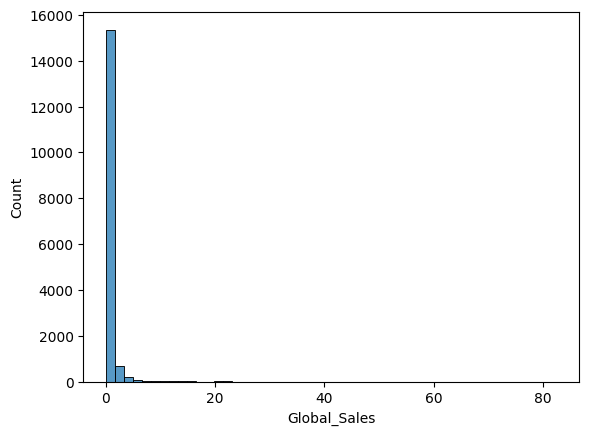

In [ ]:
# Distribuição de vendas globais

sns.histplot(df['Global_Sales'], bins=50)
plt.show()


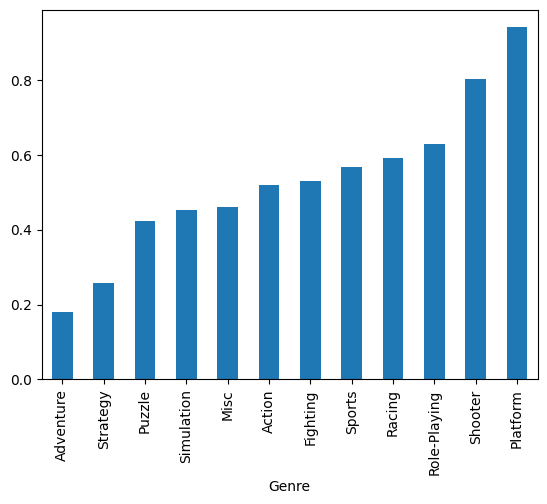

In [ ]:
# Vendas médias por gênero

df.groupby('Genre')['Global_Sales'].mean().sort_values().plot(kind='bar')
plt.show()

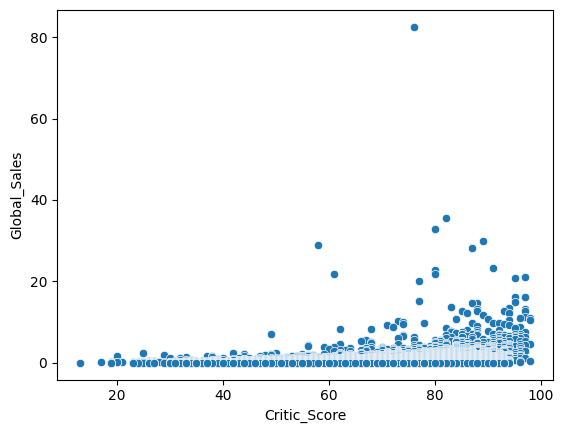

In [ ]:
# Relação entre nota da crítica e vendas

sns.scatterplot(data=df, x='Critic_Score', y='Global_Sales')
plt.show()

## Identificação de outliers

In [ ]:
# Calculando quartis

Q1 = df['Global_Sales'].quantile(0.25)
Q3 = df['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Limites para outliers

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Selecionando os outliers

outliers = df[(df['Global_Sales'] < limite_inferior) | (df['Global_Sales'] > limite_superior)]
print(f"Quantidade de outliers: {outliers.shape[0]}")
print(outliers[['Name','Global_Sales']])

Quantidade de outliers: 1872
                                    Name  Global_Sales
0                             Wii Sports         82.53
1                      Super Mario Bros.         40.24
2                         Mario Kart Wii         35.52
3                      Wii Sports Resort         32.77
4               Pokemon Red/Pokemon Blue         31.37
...                                  ...           ...
1887          WWE SmackDown vs. Raw 2011          1.09
1888  LEGO Star Wars III: The Clone Wars          1.09
1889                    NCAA Football 13          1.09
1890                             Skate 2          1.09
1891                      NFL Blitz 2000          1.09

[1872 rows x 2 columns]


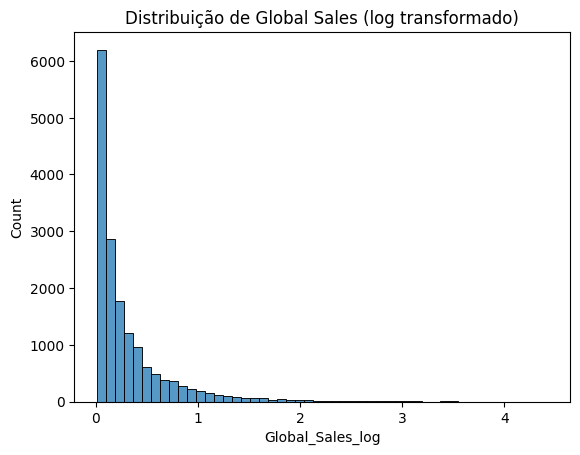

In [ ]:
# Criar uma nova coluna com log(1 + x)
df['Global_Sales_log'] = np.log1p(df['Global_Sales'])

# Visualizar distribuição com log

sns.histplot(df['Global_Sales_log'], bins=50)
plt.title('Distribuição de Global Sales (log transformado)')
plt.show()